# Credit Card Fraud

Base de dados utilizada no projeto: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Descrição do Problema

Empresas que realizam transações com cartões de creditos tem um problema ocorrido periodicamente até os dias de hoje, que seria as transações fraudulentas pelo cartão, muita das vezes essas transações podem ser evitadas já que muitas delas fogem do padrão de consumo do cliente e poderia ser facilmente recusado seguindo o padrão e evitando possiveis cobranças indesejadas, e estrategias de machine learning eficientes já é uma realidade em bancos mais renomados onde é possivel automatizar o processo e detectar possiveis outliers e impedir transações inportunas.

A base de dados utilizada, como descritiva pelo autor, foi relizado no periodo de 2 dias entre setembro de 2013 por titulares europeus onde foram realizadas 284.807 transações sendo 492 delas transações reconhecidas como fraudes cerca de 0.172% da base de dados.

Com essa base de dados irei analisar os dados, realizar insights e por fim fazer um modelo de predição eficiente para prever uma possivel transação fraudulenta com os melhores atributos e modelos.

Os valores de V1... V28 são dados mascarados por segurança pelo autor da base de dados, "Time" é o intervalo de tempo entre cada transição e ordena os dados incialmente, "Amount" é a quantia da transação, por fim "Class" o valor de previsão 0 siginfica transação legitima e 1 siginifica fraude.

## 1. Importação das bibliotecas


Bibliotecas internas disponivel na pasta <a href="../utils">utils</a> do projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from utils.model_utils import *

## 2. Descrição dos dados


In [2]:
df = pd.read_csv("../data\creditcard.csv")

In [3]:
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.loc[df['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [7]:
df.loc[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
df.loc[df['Class'] == 0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
df.duplicated().sum()

1081

In [11]:
correlação = df.corr()

In [12]:
correlação['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

Insights

* Media de transação de 88$.
* 284807 linhas de dados.
* Previsores já pré-padronizados.
* Dataframe com valores de fraudes desequilibrados.
* Sem valores nulos.
* Correlação de mais peso da nossa classe são [V11 V4 V2 V21 V19 V20 V8 V27 V28 ] seguido do amount.
* Valores dupicados achados, terão que ser tratados.

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Os valores duplicados foram removidos, os valores da classe não foram alterados

## 3. Visualização grafica

In [16]:
df_graph_shuffle = df.sample(frac = 1, random_state=3)

df_graph = df_graph_shuffle.iloc[:10000, [0, 1, 4, 11, 28, 29, 30]]
df_graph

,Time,V1,V4,V11,V28,Amount,Class
141186,84165.0,1.194684,0.775854,-0.763894,0.024218,4.30,0
84262,60229.0,-0.199214,-0.932254,-0.593909,-0.198011,15.99,0
31877,36547.0,-1.260365,-0.657828,-0.820191,-0.106409,104.53,0
203891,135019.0,1.958429,0.313454,0.022204,-0.066022,11.50,0
104094,68908.0,-3.340007,1.977513,-1.042911,-0.392250,9.99,0
...,...,...,...,...,...,...,...
259255,159030.0,-0.283863,-0.747023,0.273171,0.053936,1.99,0
230504,146358.0,-0.086500,-0.760599,-0.310772,0.084998,2.28,0
72402,54693.0,0.687466,1.201018,1.291487,0.066787,253.74,0
73702,55242.0,1.478097,-1.485151,-0.345867,0.010414,19.94,0


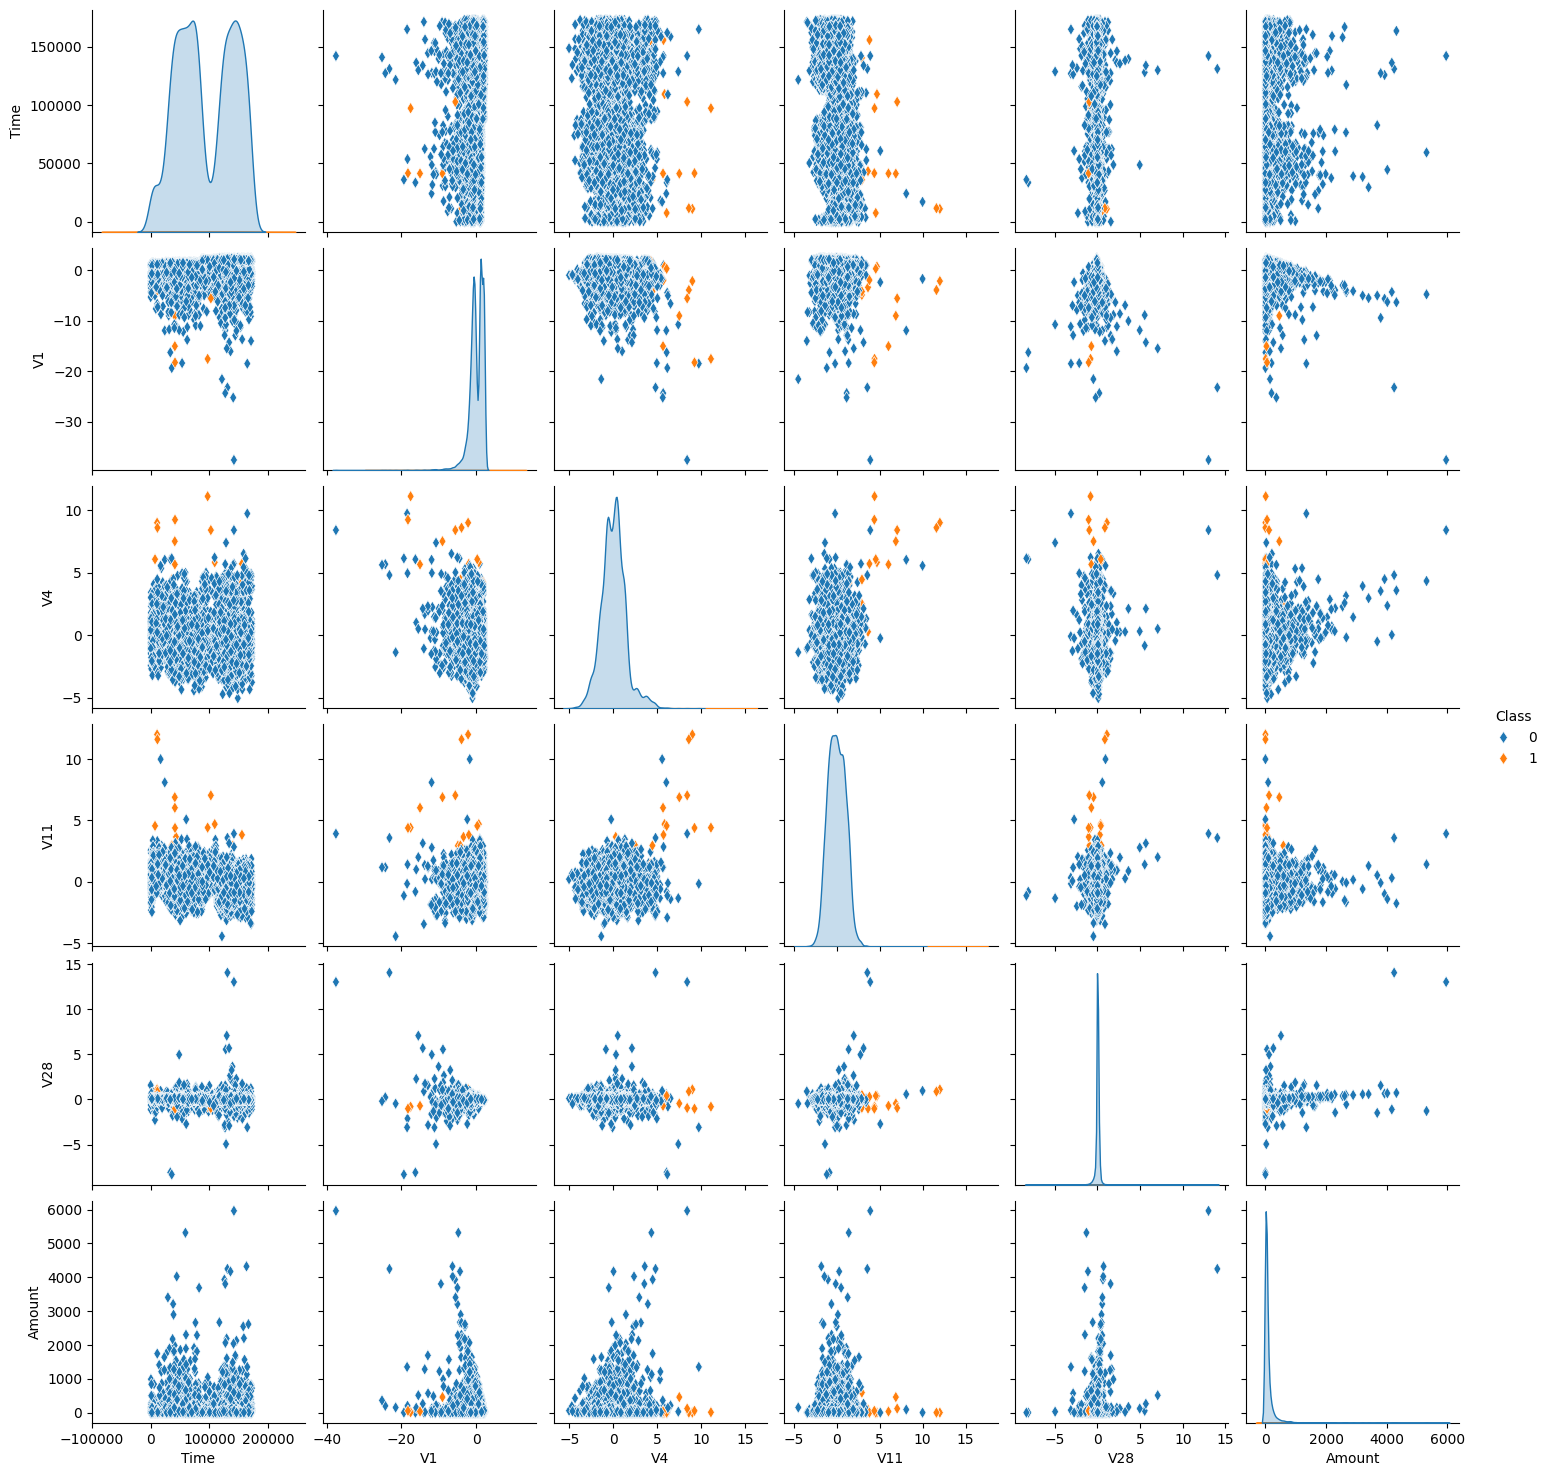

In [17]:
sns.pairplot(data=df_graph, hue='Class', markers='d')

plt.savefig('img/Matriz de dispersão.png')

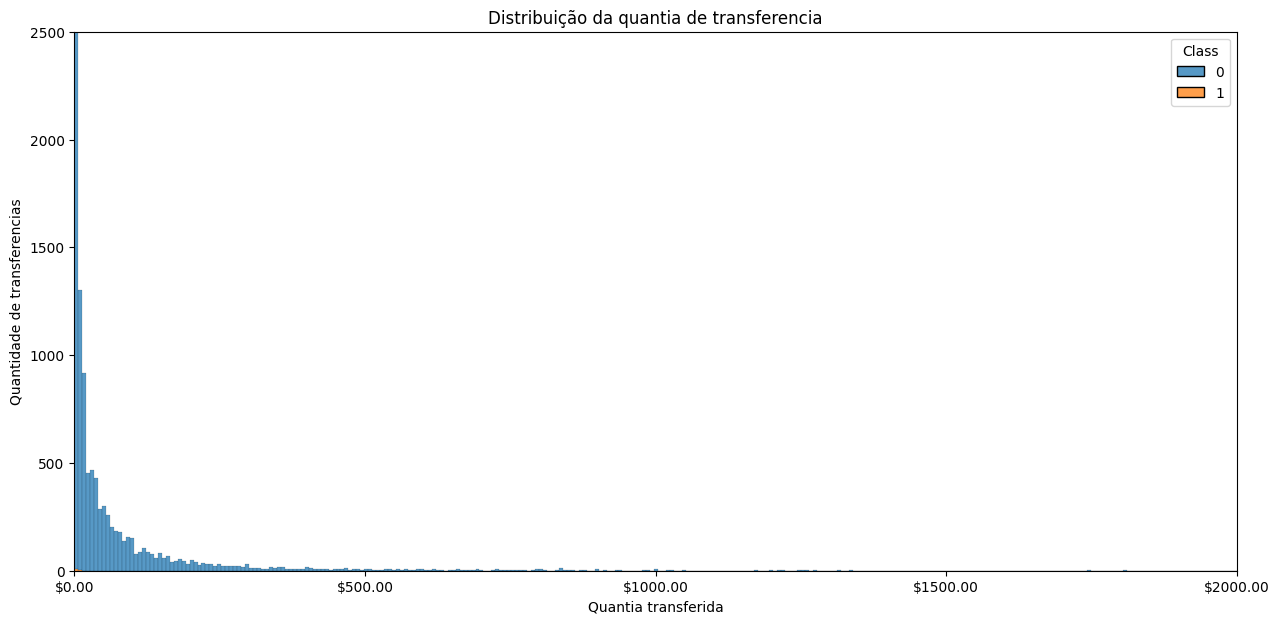

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.histplot(data=df_graph, x='Amount', hue='Class', multiple='stack')
ax.set_title('Distribuição da quantia de transferencia')
ax.set_xlabel('Quantia transferida')
ax.set_ylabel('Quantidade de transferencias')
xticks = [0, 500, 1000, 1500, 2000]
xlabels = [f'\\${x:1.2f}' for x in xticks]
ax.set_xticks(xticks, labels=xlabels)
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2500)

plt.savefig('img/Distribuição da quantia de transferencia.png')
plt.show()

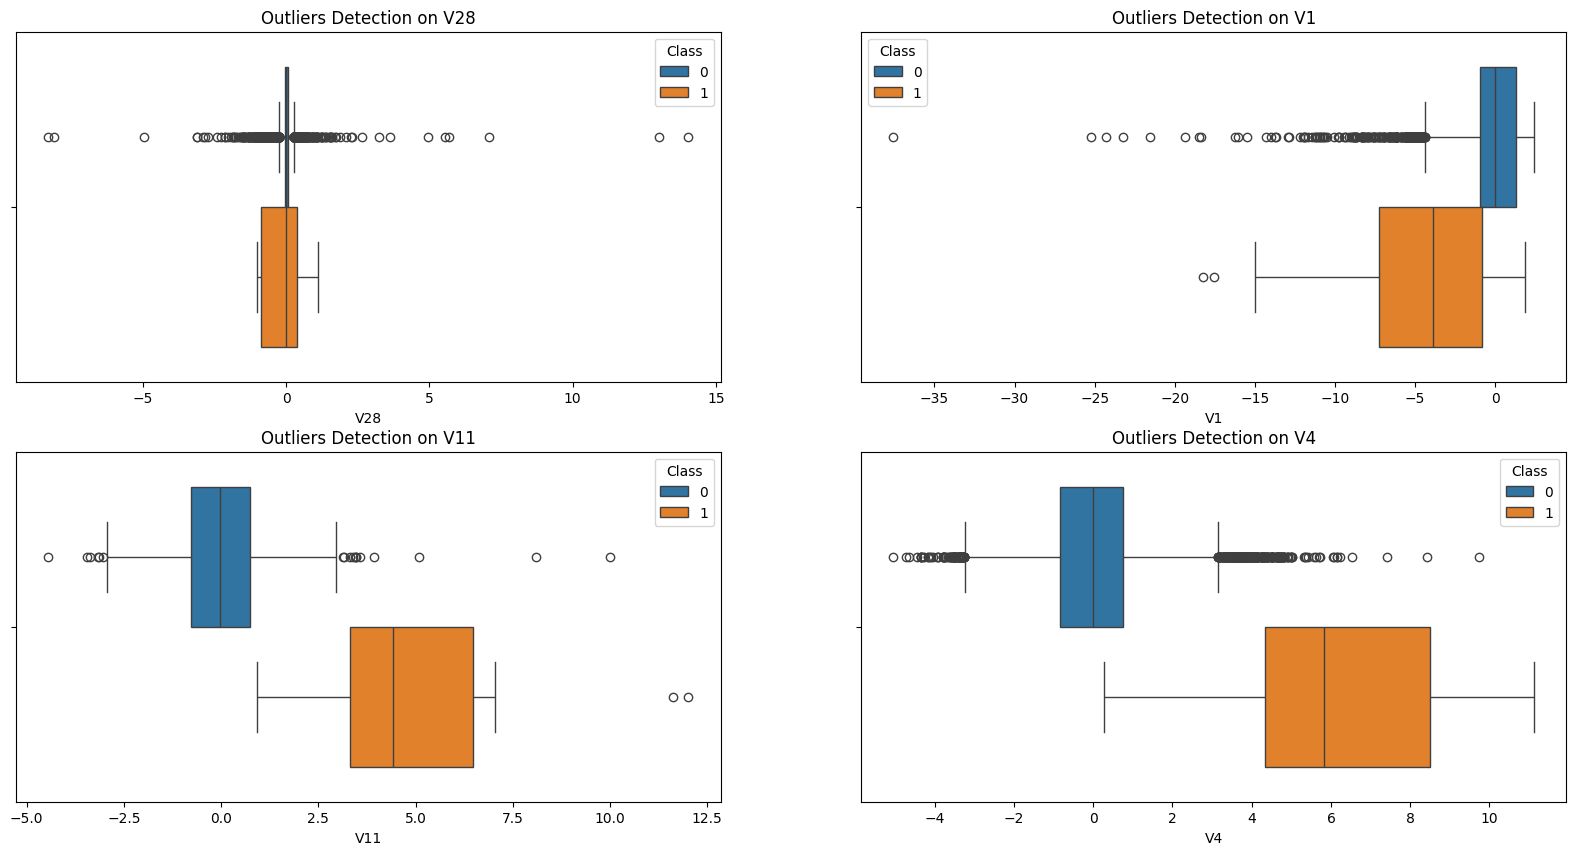

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

sns.boxplot(ax=ax[0, 0], data=df_graph, x='V28', hue='Class')
ax[0, 0].set_title("Outliers Detection on V28")

sns.boxplot(ax=ax[0,1], data=df_graph, x='V1', hue='Class')
ax[0, 1].set_title("Outliers Detection on V1")

sns.boxplot(ax=ax[1, 0], data=df_graph, x='V11', hue='Class')
ax[1, 0].set_title("Outliers Detection on V11")

sns.boxplot(ax=ax[1, 1], data=df_graph, x='V4', hue='Class')
ax[1, 1].set_title("Outliers Detection on V4")

plt.savefig('img/Detectecção de outliers boxplot.png')

In [20]:
nums = np.arange(8)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(df_graph)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Taxa de variação')

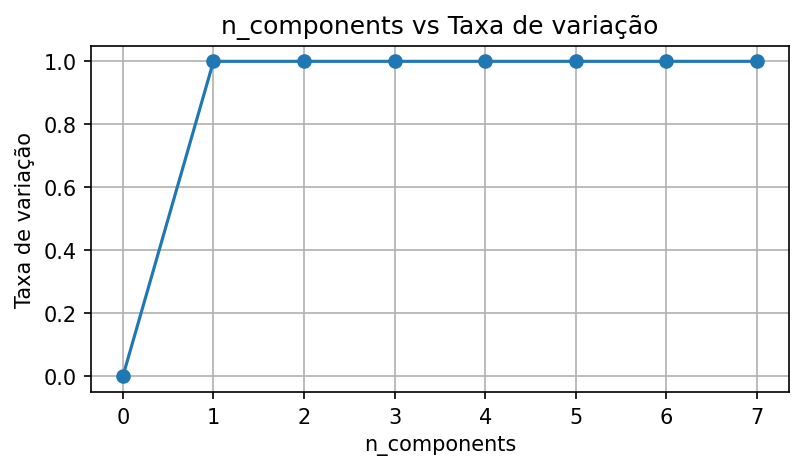

In [21]:
plt.figure(figsize=(6,3),dpi=150)

plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.title('n_components vs Taxa de variação')
plt.xlabel('n_components')
plt.ylabel('Taxa de variação')

Insights:
* A maioria das transferencias fraudulentas tem o valor baixo de $10.
* A maioria dos valores apresentado nos dados são abaixo de $500.
* Distribuição irregular das variaveis de X.
* Todas variaveis X tem outliers dependentes negativos, positivos ou ambos não será um problema mas refazer A normalização seria possivel.
* Dados com maior coorelação diante da Classe tendem a ter menos outliers.

## 4. Redimensionando e Selecionando os atributos

Separando os dados entre X(Variaveis que serão usadas para fazer a previsão) e y(a classe a ser prevista).

In [22]:
X = df.drop('Class', axis=1)
y = df['Class']

Selecionando os atributos de acordo com a variancia

In [23]:
selection = VarianceThreshold(threshold=0.400)
X_selection = selection.fit_transform(X)

In [24]:
selection.variances_

array([2.25444196e+09, 3.79479247e+00, 2.71162110e+00, 2.27611310e+00,
       1.99990938e+00, 1.89614512e+00, 1.77403285e+00, 1.50715333e+00,
       1.39016444e+00, 1.20009955e+00, 1.15864870e+00, 1.03778709e+00,
       9.89373765e-01, 9.90876669e-01, 9.06710382e-01, 8.37027410e-01,
       7.63342582e-01, 7.09816084e-01, 7.01198656e-01, 6.61582339e-01,
       5.92873642e-01, 5.24042924e-01, 5.24971527e-01, 3.89003286e-01,
       3.66782405e-01, 2.71669661e-01, 2.32374219e-01, 1.56612667e-01,
       1.07601074e-01, 6.26996571e+04])

In [25]:
X_selection.shape

(283726, 24)

In [26]:
X_selection = pd.DataFrame(X_selection, columns=X.iloc[:, 0:24].columns)

In [27]:
X_selection

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,0.77
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,24.79
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,67.88
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,10.00


Divindo entre treino e teste, evitando o overfitting.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_selection, y, test_size=0.25,  random_state=3)

In [29]:
X_train.shape, X_test.shape

((212794, 24), (70932, 24))

In [30]:
y_train.shape, y_test.shape

((212794,), (70932,))

In [31]:
y_train.value_counts(), y_test.value_counts()

(Class
 0    212427
 1       367
 Name: count, dtype: int64,
 Class
 0    70826
 1      106
 Name: count, dtype: int64)

In [32]:
validation_clf_models(X_train, X_test, y_train, y_test)

c:\Users\miche\OneDrive\Área de Trabalho\Credit-card\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


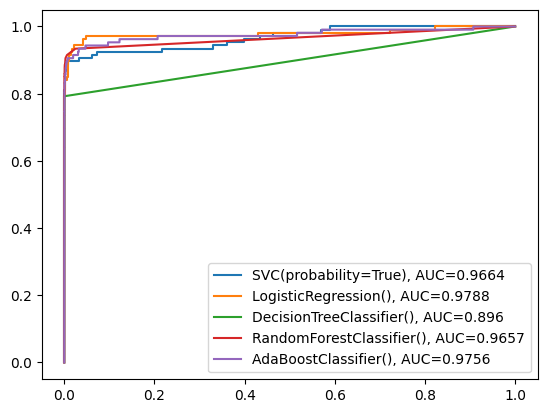

In [33]:
plot_validation_clf_models(X_train, X_test, y_train, y_test)

## 5. Avaliando modelos e Hiperparametros